In [6]:
# Importing and reading csv file
import pandas as pd
df = pd.read_csv("Mall Customers.csv")
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


✅ Dataset Overview
Total Rows: 200

Total Columns: 7

🏷️ Column-wise Summary
Column	Type	Description / Sample Values
CustomerID	int64	Unique ID for each customer (1 to 200)
Gender	object	Male (M) / Female (F)
Age	int64	Range: 18 to 70 (Mean: ~39)
Education	object	Levels: Graduate, High School, Uneducated, etc. (7 total)
Marital Status	object	Married, Single, Unknown, Divorced
Annual Income (k$)	int64	Range: 15k to 137k
Spending Score (1-100)	int64	Customer score: 1 to 99 (Mean: ~50)

📌 Observations
Gender: Slightly more females (112 F, 88 M).

Income vs Spending: Can be analyzed for clustering or segmentation.

Spending Score is spread widely — good for identifying low vs high-spending customers.

Potential for customer segmentation using age, income, and spending score.

In [7]:
# To get the column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Education ', 'Marital Status',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [8]:
# To drop the unnecessary columns
df = df.drop(columns=['CustomerID','Gender','Education ','Marital Status'],axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
# Adding Frequency column mannually
import numpy as np
df['Frequency'] = np.random.randint(1,20,size = len(df))
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Frequency
0,19,15,39,4
1,21,15,81,10
2,20,16,6,14
3,23,16,77,17
4,31,17,40,3


In [10]:
# renaming columns
df = df.rename(columns={
    'Annual Income (k$)':'Income$',
    'Spending Score (1-100)':'Spending'
})
df.head()

,Age,Income$,Spending,Frequency
0,19,15,39,4
1,21,15,81,10
2,20,16,6,14
3,23,16,77,17
4,31,17,40,3


In [11]:
# to convert k$ to the $
df['Income$'] = df['Income$']*1000
df.head()

,Age,Income$,Spending,Frequency
0,19,15000,39,4
1,21,15000,81,10
2,20,16000,6,14
3,23,16000,77,17
4,31,17000,40,3


In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Select the features
X = df[['Age', 'Income$', 'Spending', 'Frequency']]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

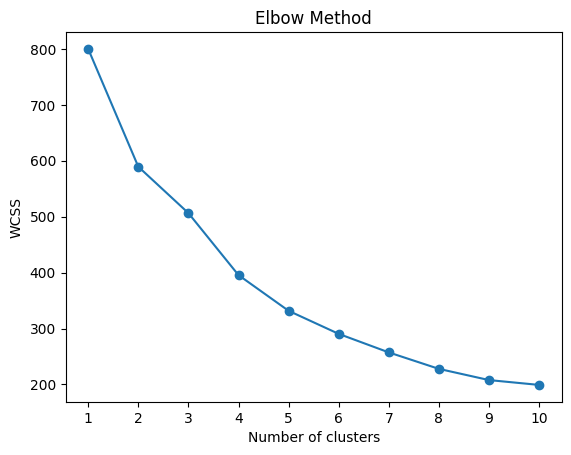

In [15]:
# Importing required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# To get the best k value(Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualizing Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Conclusion: According to elbow score k=4

In [16]:
# apply K-means clustering

# elbow showed k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df['Cluster'] = clusters

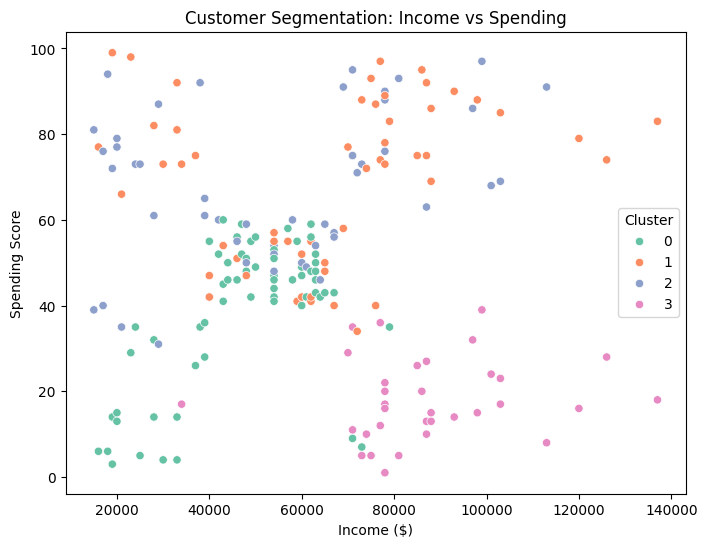

In [17]:
# Visualizing cluster
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income$'], y=df['Spending'], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segmentation: Income vs Spending')
plt.xlabel('Income ($)')
plt.ylabel('Spending Score')
plt.show()


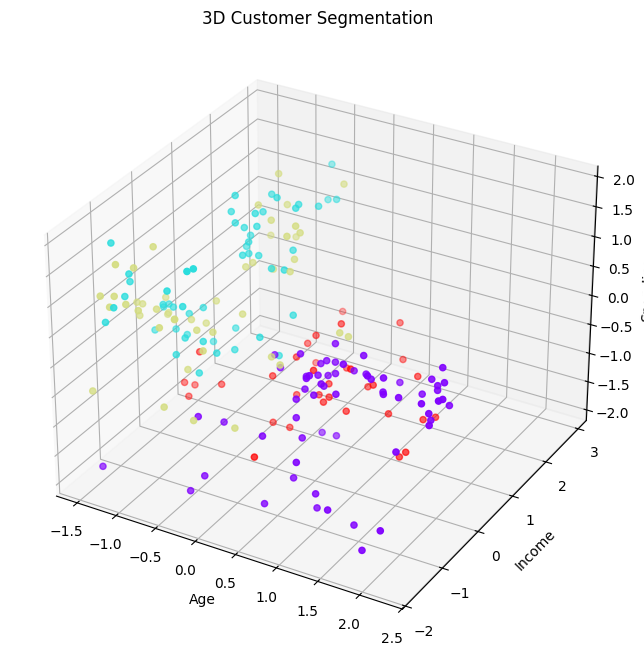

In [18]:
# 3D view
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
plt.title('3D Customer Segmentation')
plt.show()
